### 2.3.1 データを読み込む

In [20]:
import numpy as np

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

NUM_CLASSES = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [21]:
x_train[54, 12, 13, 1] # 0.36862746

0.36862746

### 2.3.2 モデルを作成する

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Dense(200, activation = 'relu', input_shape=(32, 32, 3)),
    Flatten(),
    Dense(150, activation = 'relu'),
    Dense(10, activation = 'softmax'),
])

In [23]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape=(32,32,3))

x = Flatten()(input_layer)

x = Dense(units=200, activation = 'relu')(x)
x = Dense(units=150, activation = 'relu')(x)


output_layer = Dense(units=10, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 200)               614600    
_________________________________________________________________
dense_16 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


### 2.3.3 モデルをコンパイルする

In [24]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'])

### 2.3.4 モデルを訓練する

In [25]:
model.fit(x_train           # 画像データ
         , y_train          # one-hot エンコーディングされたクラスを表すラベル
         , batch_size = 32  # batch_size は各訓練ステップで何個の観測をこのネットワークに渡すかを決定します
         , epochs = 10      # epoch はこのネットワークに何回,全トレーニングデータを渡すかを決定します
         , shuffle = True   # shuffle = True の場合,バッチは各訓練ステップで訓練データからランダムに重複なく取り出されます
         )

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8523 - accuracy: 0.3335
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6680 - accuracy: 0.4026
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5934 - accuracy: 0.4335
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5365 - accuracy: 0.4546
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4979 - accuracy: 0.4651
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4660 - accuracy: 0.4772
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4391 - accuracy: 0.4888
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4177 - accuracy: 0.4964
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3945 - accuracy: 0.5043
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.37

### 2.3.5 モデルを評価する

In [26]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4351 - accuracy: 0.4858


[1.4350647926330566, 0.48579999804496765]

In [27]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)  # predsは[10000, 10]の形状の配列,すなわち,それぞれの観測に対する10クラスの確率ベクトルです
preds_single = CLASSES[np.argmax(preds, axis = -1)]  # この確率の配列をnumpyのargmax関数を用いて単一の予測に変換します
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

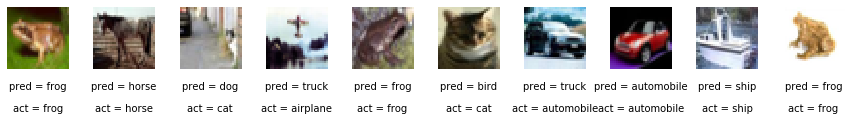

In [29]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = '+ str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)